Task 1: Understanding Exploratory Data Analysis

Task 2: Importing libraries and Exploring the Dataset

Task 3: Checking missing values and Outliers

Task 4: Creating visual methods to analyze the data

Task 5: Analyzing trends, patterns, and relationships in the Data.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots

ModuleNotFoundError: No module named 'statsmodels'

In [7]:
%config Completer.use_jedi = False

In [3]:
insurance_df = pd.read_csv('insurance-data.csv')

In [4]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Expected output:
2 integer type, 2 float type and 3 object type (String in the column)

## Task 3: Checking missing values and Outliers

In [10]:
insurance_df.isnull().any()
# There is no any null values

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [13]:
#еще один способ
insurance_df.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


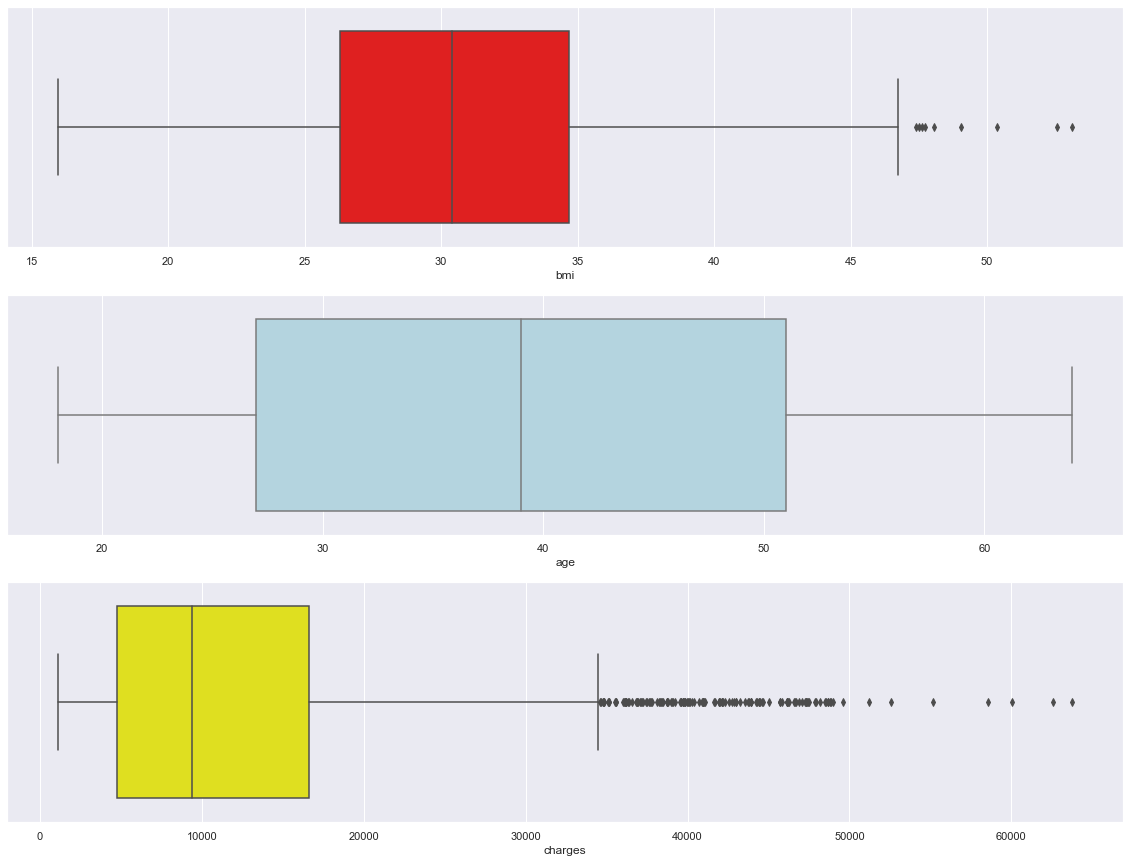

In [19]:
# Checking for the outliers
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=insurance_df.bmi, color='red')

plt.subplot(3,1,2)
sns.boxplot(x=insurance_df.age, color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(x=insurance_df.charges, color='yellow')

plt.show()

Output should include this Analysis:
- bmi has a few extreme values

- charges as it is highly skewed, there are quiet a lot of extreme values

In [21]:
# a brief summary for the dataset
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Task 4: Creating visual methods to analyze the data

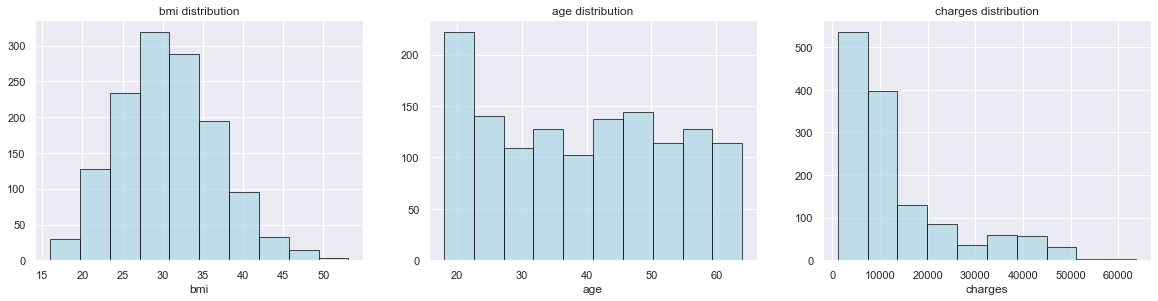

In [34]:
# Plots to see the distribution of the continious features individually

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('bmi')
plt.title('bmi distribution')

plt.subplot(3,3,2)
plt.hist(insurance_df.age, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('age')
plt.title('age distribution')

plt.subplot(3,3,3)
plt.hist(insurance_df.charges, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('charges')
plt.title('charges distribution')


plt.show()

In [36]:
# showing the skewness of variables
Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),
                            stats.skew(insurance_df.age),
                           stats.skew(insurance_df.charges)]},
            index=['bmi', 'age', 'charges'])

In [37]:
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


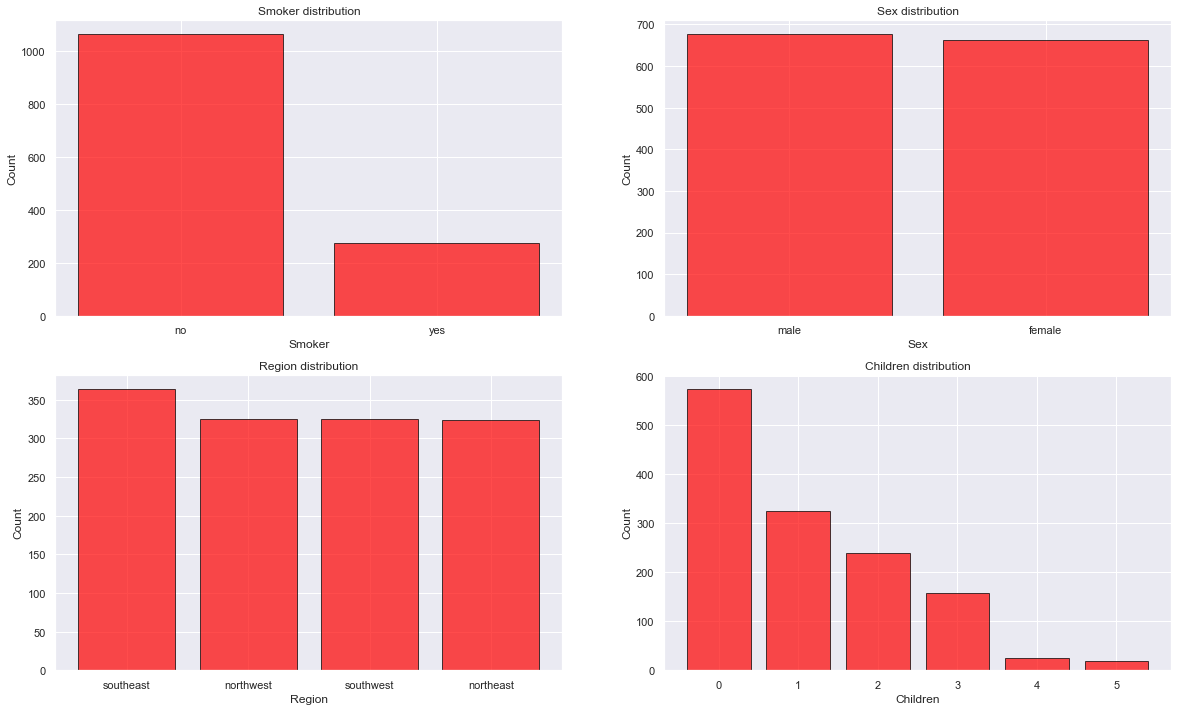

In [57]:
# visualizing data to make analyzis
plt.figure(figsize=(20,25))

x = insurance_df.smoker.value_counts().index #Values for x-axis
y = [insurance_df.smoker.value_counts()[i] for i in x]

plt.subplot(4,2,1)
plt.bar(x,y, align='center', color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Smoker distribution')

x1 = insurance_df.sex.value_counts().index #Values for x-axis
y1 = [insurance_df.sex.value_counts()[i] for i in x1]

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center', color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Sex distribution')

x2 = insurance_df.region.value_counts().index #Values for x-axis
y2 = [insurance_df.region.value_counts()[i] for i in x2]

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center', color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Region distribution')

x3 = insurance_df.children.value_counts().index #Values for x-axis
y3 = [insurance_df.children.value_counts()[i] for i in x3]

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center', color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children distribution')



plt.show()

In [71]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings
insurance_df_encoded = copy.deepcopy(insurance_df)
insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:, ['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)

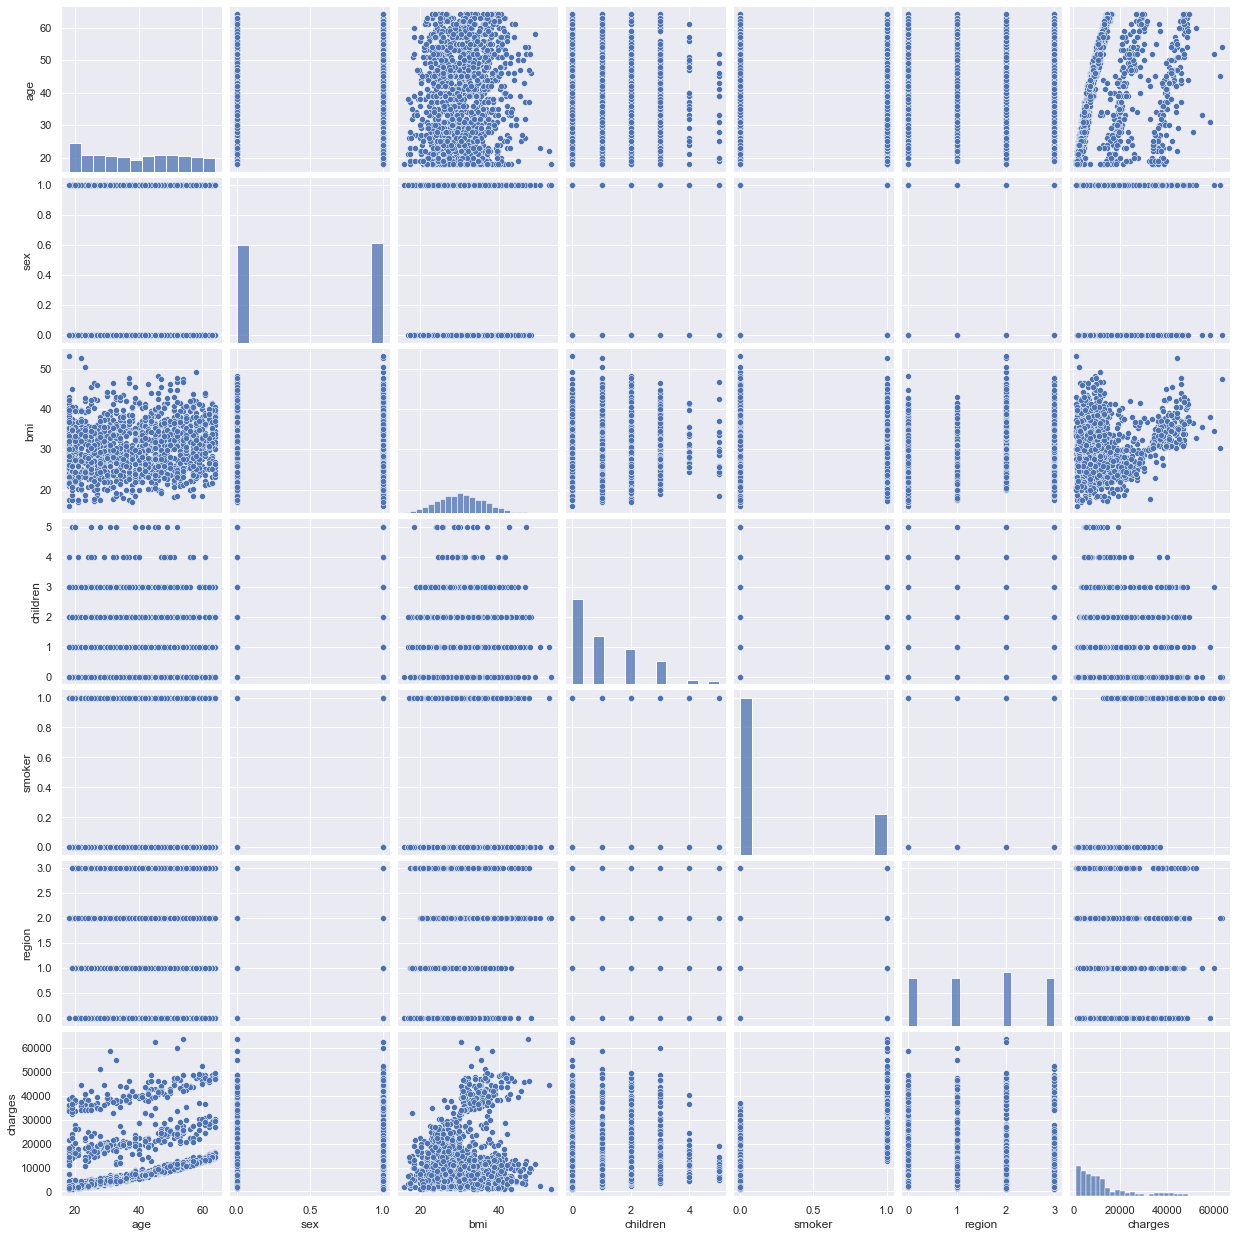

In [73]:
sns.pairplot(insurance_df_encoded)
plt.show()

## Task 5: Analyzing trends, patterns, and relationships in the Data.

In [78]:
# Do charges of people who smoke differ significantly from the people who don't?
print('Do charges of people who smoke differ significantly from the people who don\'t?')
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

/Users/u18071043/.conda/envs/working_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


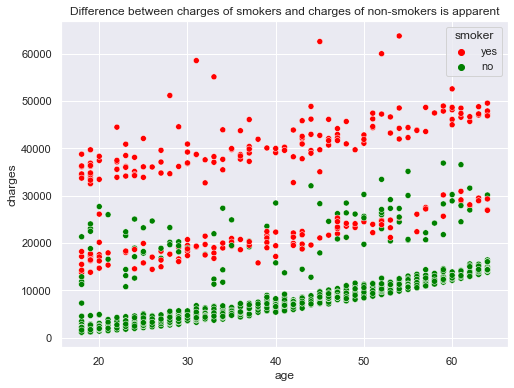

In [84]:
# scatter plot to look for visual evidence of dependency between attributes 
#smoker and charges accross
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.smoker, palette=['red', 'green'])
plt.title('Difference between charges of smokers and charges of non-smokers is apparent')
plt.show()

/Users/u18071043/.conda/envs/working_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


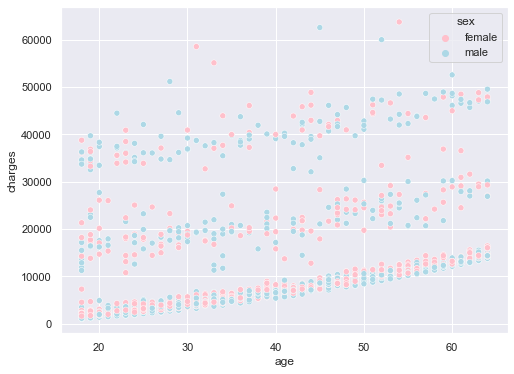

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.charges, hue=insurance_df.sex, palette=['pink', 'lightblue'])
plt.show()


In [97]:
# T-test to check dependency of smoking on charges
Ho = 'Charges of smoker and non-smoker are same' # Starting the Null Hypothesis
Ha = 'Charges of smoker and non-smoker are not the same' # Starting the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.smoker == 'yes'].charges)
y = np.array(insurance_df[insurance_df.smoker == 'no'].charges)

t, p_value = stats.ttest_ind(x, y, axis=0)

if(p_value < 0.05):
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842179102e-283) < 0.05


In [94]:
# Does bmi of males differ significantly from of females?
print('Does bmi of males differ significantly from of females')
insurance_df.sex.value_counts()

Does bmi of males differ significantly from of females


male      676
female    662
Name: sex, dtype: int64

In [98]:
# T-test to check dependency of smoking on charges
Ho = 'Gender has no effect on bmi' # Starting the Null Hypothesis
Ha = 'Gender has effect on bmi' # Starting the Alternate Hypothesis

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi)
y = np.array(insurance_df[insurance_df.sex == 'female'].bmi)

t, p_value = stats.ttest_ind(x, y, axis=0)

if(p_value < 0.05):
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


In [106]:
# bmi of both genders are identical

In [108]:
# Is the proportion of smokers significantly different in different genders?
Ho = 'Gender has no effect on smoking habits' # Starting the Null Hypothesis
Ha = 'Gender has an effect on smoking habits' # Starting the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'], insurance_df['smoker'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)


if(p_value < 0.05):
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab    

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


In [110]:
# Is the proportion of smokers significantly different in different genders?
Ho = 'Region has no effect on smoking habits' # Starting the Null Hypothesis
Ha = 'Region has an effect on smoking habits' # Starting the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['region'], insurance_df['smoker'])

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)


if(p_value < 0.05):
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab.T

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [113]:
# Is the distribution of bmi across women with no children, one child and two children are the same?
Ho = 'No. of children has no effect on bmi' # Starting the Null Hypothesis
Ha = 'No. of children has an effect on bmi' # Starting the Alternate Hypothesis

female_df = copy.deepcopy(insurance_df[insurance_df['sex']=='female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero, one, two)



if(p_value < 0.05):
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
